Link to competition: https://www.kaggle.com/c/fungi-challenge-fgvc-2018/overview

# Preparations

In [1]:
%reload_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
from fastai.vision import * 
from fastai.metrics import top_k_accuracy
import json
from itertools import groupby

In [3]:
np.random.seed(1991)

How many training examples are processed in one iteration. If you face memory errors, decrease the batch size

In [4]:

batch_size = 64

Which image augmentation tecniques are used for the training data. Play with different options and see how they affect the results.

In [5]:
# tfms = None #t = t1
tfms = get_transforms() #t = t2
# tfms...? #t = t3

In [14]:
t = "t2"

The model that is going to be used in the classification task

In [6]:
model = models.resnet34
# model = models.resnet50

The size to be used for progressive resizing

In [7]:
image_size = 128

# Loading Data

In [8]:
data_path_str = "data"
train_path_str = "train"
test_path_str = "test"

In [9]:
data = ImageDataBunch.from_folder(
    path = data_path_str,
    train = train_path_str,
    test = test_path_str,
    size = image_size,
    ds_tfms = tfms,
    bs = batch_size,
    valid_pct = 0.2
).normalize(imagenet_stats)

# Training the model

We will use as our accuracy metrics top_k_accuracy, as it was the one used in the competition presented in Kaggle.

We will train first re-train only the top most layer of the model

In [10]:
top_k_accuracy_3 = partial(top_k_accuracy, k=3)

In [11]:
learner = cnn_learner(data, model, metrics=top_k_accuracy_3)

epoch,train_loss,valid_loss,top_k_accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


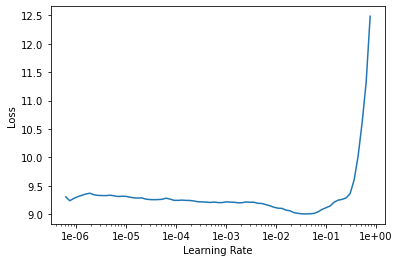

In [12]:
learner.lr_find()
learner.recorder.plot()

In [13]:
lr = 1e-02/2

In [15]:
fit_one_cycle(learner, 5, max_lr=lr)

epoch,train_loss,valid_loss,top_k_accuracy,time
0,5.429524,4.965275,0.220143,12:59
1,4.784676,4.396805,0.300301,06:36
2,4.365839,3.886224,0.393884,06:35
3,4.017992,3.555069,0.450479,06:35
4,3.709124,3.465487,0.468137,06:36


FILE NAMING:

model_tfms_imagesize_stage

explain verbally what the used tfms were exactly

EXAMPLE

resnet34_t1_121_stage1

t1 = NONE 

t2 = get_transforms()

In [18]:
file_name = "_".join([model.__name__, t ,str(image_size), "stage1"]);file_name

'resnet34_t2_128_stage1'

In [19]:
learner.save(file_name)

'resnet34_t1_128_stage1'